# Data exploration notebook

In [82]:
import pandas as pd
import numpy as np
import datetime as dt
from plotnine import ggplot, aes, labs, theme, theme_classic, facet_wrap, geom_histogram

In [58]:
campaign_ad = pd.read_csv("MLUnige2023_subscriptions_train.csv", index_col="Id")

In [59]:
campaign_ad

,age,job,marital,education,device,day,month,time_spent,banner_views,banner_views_old,days_elapsed_old,outcome_old,X1,X2,X3,X4,subscription
Id,,,,,,,,,,,,,,,,,
0,28,freelance,married,grad_school,smartphone,4,2,26.80,3,4,196,failure,0,0,1,0.072803,1
1,48,industrial_worker,married,university,smartphone,30,4,13.05,1,1,79,success,0,0,0,0.075454,1
2,27,teacher,married,university,smartphone,14,7,8.10,3,0,-1,na,0,1,1,0.068110,0
3,44,unemployed,divorced,university,smartphone,13,5,7.10,2,1,369,other,0,0,1,0.091942,0
4,29,manager,single,grad_school,smartphone,26,4,15.90,2,2,143,success,0,0,0,0.085922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8947,54,industrial_worker,married,university,smartphone,16,7,7.30,1,0,-1,na,1,0,0,0.072803,0
8948,43,industrial_worker,married,university,smartphone,4,2,37.75,2,0,-1,na,0,0,1,0.081456,1
8949,27,manager,single,grad_school,na,5,6,29.00,3,0,-1,na,0,0,1,0.079186,1


In [60]:
campaign_ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8952 entries, 0 to 8951
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8952 non-null   int64  
 1   job               8952 non-null   object 
 2   marital           8952 non-null   object 
 3   education         8952 non-null   object 
 4   device            8952 non-null   object 
 5   day               8952 non-null   int64  
 6   month             8952 non-null   int64  
 7   time_spent        8952 non-null   float64
 8   banner_views      8952 non-null   int64  
 9   banner_views_old  8952 non-null   int64  
 10  days_elapsed_old  8952 non-null   int64  
 11  outcome_old       8952 non-null   object 
 12  X1                8952 non-null   int64  
 13  X2                8952 non-null   int64  
 14  X3                8952 non-null   int64  
 15  X4                8952 non-null   float64
 16  subscription      8952 non-null   int64  


No missing values in dataset indentified by python.
However, columns

- `job`
- `education`
- `device`
- `outcome_old`

have missing values in the form of the string `'na'`.

`day` and `month` should probably be combined into a date column.

In [61]:
campaign_ad.replace('na', np.nan, inplace=True)

In [62]:
campaign_ad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8952 entries, 0 to 8951
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               8952 non-null   int64  
 1   job               8891 non-null   object 
 2   marital           8952 non-null   object 
 3   education         8574 non-null   object 
 4   device            6902 non-null   object 
 5   day               8952 non-null   int64  
 6   month             8952 non-null   int64  
 7   time_spent        8952 non-null   float64
 8   banner_views      8952 non-null   int64  
 9   banner_views_old  8952 non-null   int64  
 10  days_elapsed_old  8952 non-null   int64  
 11  outcome_old       2148 non-null   object 
 12  X1                8952 non-null   int64  
 13  X2                8952 non-null   int64  
 14  X3                8952 non-null   int64  
 15  X4                8952 non-null   float64
 16  subscription      8952 non-null   int64  


Now we definitely have some missing values!

In [63]:
campaign_ad['date'] = [dt.date(2022, campaign_ad['month'][x], campaign_ad['day'][x]) for x in range(len(campaign_ad))]

In [64]:
campaign_ad.drop(columns=['day', 'month'], inplace=True)
campaign_ad


,age,job,marital,education,device,time_spent,banner_views,banner_views_old,days_elapsed_old,outcome_old,X1,X2,X3,X4,subscription,date
Id,,,,,,,,,,,,,,,,
0,28,freelance,married,grad_school,smartphone,26.80,3,4,196,failure,0,0,1,0.072803,1,2022-02-04
1,48,industrial_worker,married,university,smartphone,13.05,1,1,79,success,0,0,0,0.075454,1,2022-04-30
2,27,teacher,married,university,smartphone,8.10,3,0,-1,NaN,0,1,1,0.068110,0,2022-07-14
3,44,unemployed,divorced,university,smartphone,7.10,2,1,369,other,0,0,1,0.091942,0,2022-05-13
4,29,manager,single,grad_school,smartphone,15.90,2,2,143,success,0,0,0,0.085922,1,2022-04-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8947,54,industrial_worker,married,university,smartphone,7.30,1,0,-1,NaN,1,0,0,0.072803,0,2022-07-16
8948,43,industrial_worker,married,university,smartphone,37.75,2,0,-1,NaN,0,0,1,0.081456,1,2022-02-04
8949,27,manager,single,grad_school,NaN,29.00,3,0,-1,NaN,0,0,1,0.079186,1,2022-06-05


In [65]:
cols = list(campaign_ad.columns)
datecol = cols[-1]
cols[6:] = cols[5:len(cols)-1]
cols[5] = datecol

campaign_ad = campaign_ad[cols]
campaign_ad

In [68]:
campaign_ad.describe()

,age,time_spent,banner_views,banner_views_old,days_elapsed_old,X1,X2,X3,X4,subscription
count,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000
mean,41.201743,17.130306,2.540550,0.759160,49.403262,0.141086,0.013963,0.496984,0.086603,0.416443
std,11.638321,16.902741,2.824065,2.099277,107.365840,0.348129,0.117345,0.500019,0.030253,0.492996
min,18.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,6.100000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.073891,0.000000
50%,39.000000,11.450000,2.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.077661,0.000000
75%,49.000000,22.500000,3.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.087768,1.000000
max,95.000000,245.400000,63.000000,58.000000,854.000000,1.000000,1.000000,1.000000,0.810043,1.000000


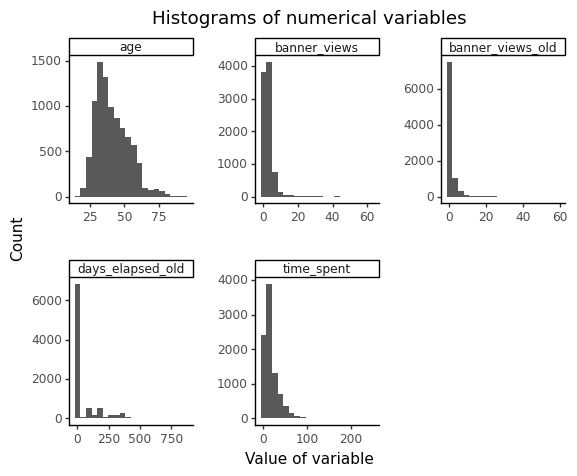

<ggplot: (8790761851411)>

In [99]:
camp_num_melt = campaign_ad[['age', 'time_spent', 'banner_views', 'banner_views_old', 'days_elapsed_old']].melt()
camp_num_melt

ggplot(camp_num_melt
    ) + aes('value'
    ) + facet_wrap('variable', scales='free'
    ) + geom_histogram(bins = 20
    ) + theme_classic(
    ) + theme(subplots_adjust={'wspace': 0.5, 'hspace': 0.5}
    ) + labs(title='Histograms of numerical variables',
             x='Value of variable',
             y='Count')